# Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
!pip install pyspellchecker
from sklearn.metrics import confusion_matrix, classification_report
import spellchecker
from spellchecker.spellchecker import SpellChecker

In [ ]:
twitter = pd.read_csv(f'/content/sample.csv')
twitter.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


Exploratory Data analysis

In [ ]:
# to check the columns which have the missing values
twitter.isna().any()

textID           False
text              True
selected_text     True
sentiment        False
dtype: bool

In [ ]:
# drop rows having NaN values
twitter = twitter.dropna()

In [ ]:
twitter.isna().any()

textID           False
text             False
selected_text    False
sentiment        False
dtype: bool

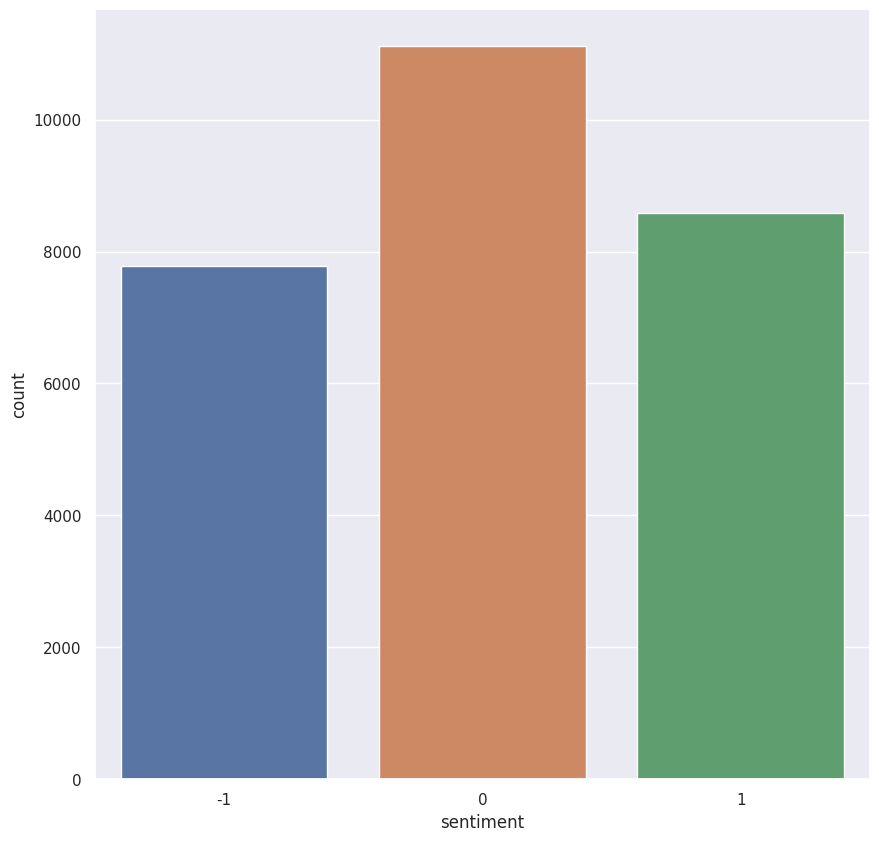

In [ ]:
# See the values counts of the sample as postive, negative and neutral
twitter['sentiment'] = twitter['sentiment'].map({'positive': 1, 'negative': -1, 'neutral':0}, na_action = None)
count = sns.countplot(data = twitter, x = 'sentiment')
plt.show()

## Word Clould

### Positive Sentimental WordCloud

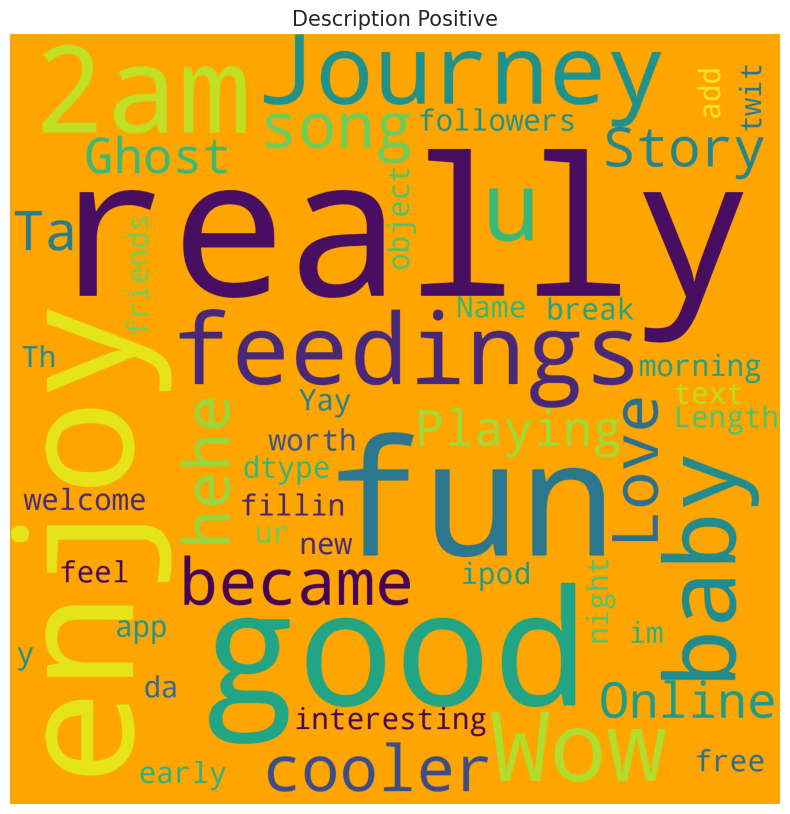

In [ ]:
positive = twitter[twitter['sentiment'] == 1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange' , width = 1500, height = 1500).generate(str(positive['text']))
plt.title('Description Positive', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

Negative Sentimental WordCloud

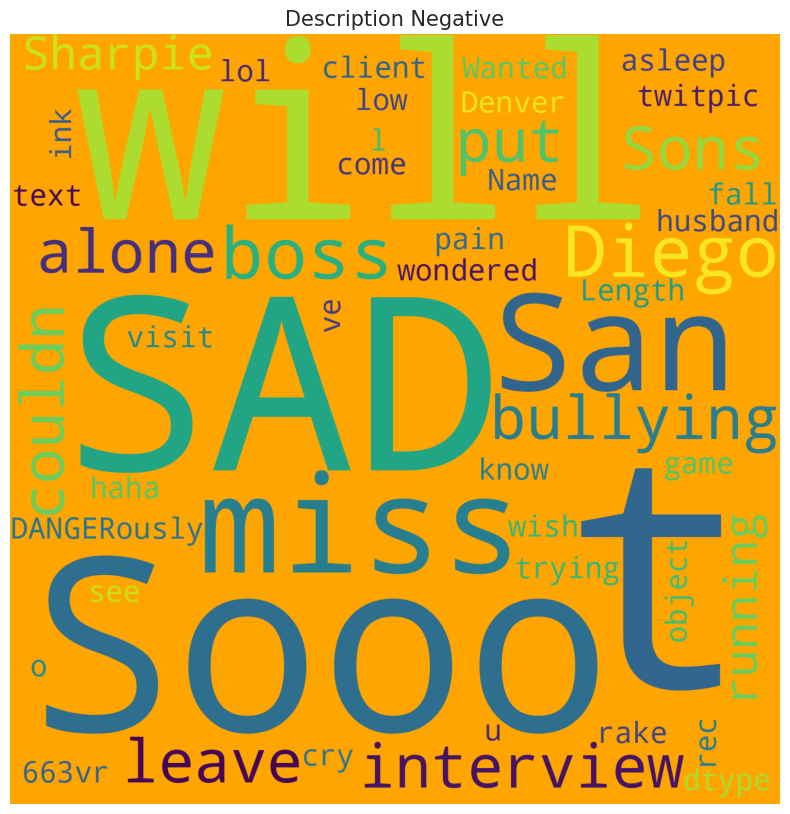

In [ ]:
negative = twitter[twitter['sentiment'] == -1]
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange' , width = 1500, height = 1500).generate(str(negative['text']))
plt.title('Description Negative', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

Neutral Sentimental WOrdClould

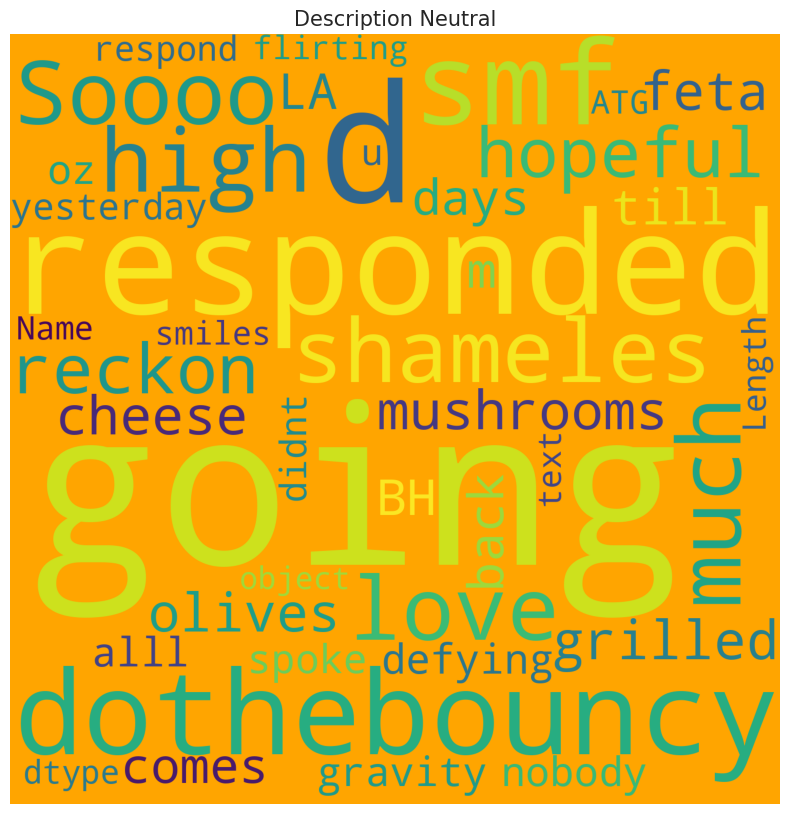

In [ ]:
neutral = twitter[twitter['sentiment'] == 0]
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange' , width = 1500, height = 1500).generate(str(neutral['text']))
plt.title('Description Neutral', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
twitter.sentiment.value_counts()

 0    11117
 1     8582
-1     7781
Name: sentiment, dtype: int64

Let us take a look at some of the tweets to undertsand the length of the text sample.

In [ ]:
twitter['len'] = twitter['text'].str.len()
twitter.len.value_counts()

41     308
48     301
46     301
42     298
45     295
      ... 
4        8
3        5
139      4
141      2
140      1
Name: len, Length: 139, dtype: int64

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

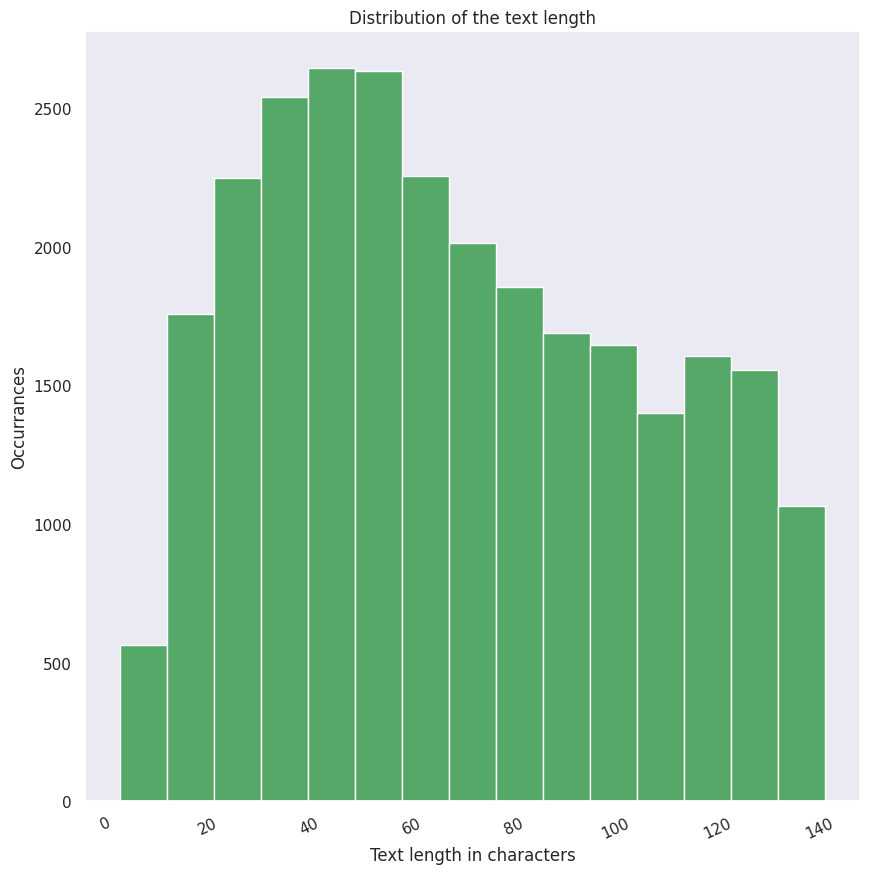

In [ ]:
twitter.len.plot(kind="hist", bins = 15, color='g')
plt.title("Distribution of the text length")
plt.xlabel("Text length in characters")
plt.ylabel("Occurrances")
plt.grid()
plt.xticks(rotation =25)


In [ ]:
# Let us check number of words in each tweet
twitter['num_words'] = twitter['text'].str.split().str.len()
twitter['num_words']

0         7
1        10
2         5
3         5
4        14
         ..
27476    16
27477    23
27478    22
27479     6
27480    11
Name: num_words, Length: 27480, dtype: int64

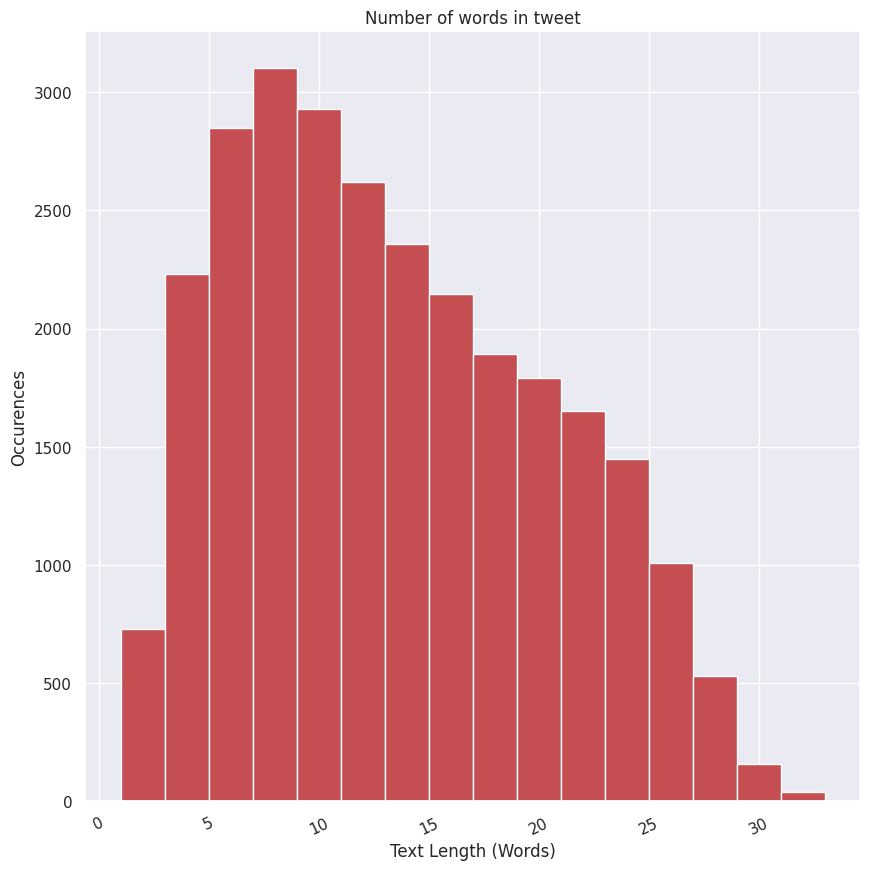

In [ ]:
twitter.num_words.plot(kind = "hist", bins = 16, color = 'r')
plt.title("Number of words in tweet")
plt.xlabel("Text Length (Words)")
plt.ylabel("Occurences")
plt.xticks(rotation=25)
sns.set(style="darkgrid")


## Data Pre-processing

Lower-case all the tweets

In [ ]:
twitter['text']  = twitter['text'].str.lower()
twitter.head()
twitter['selected_text']  = twitter['selected_text'].str.lower()
twitter.head()

,textID,text,selected_text,sentiment,len,num_words
0,cb774db0d1,"i`d have responded, if i were going","i`d have responded, if i were going",0,36,7
1,549e992a42,sooo sad i will miss you here in san diego!!!,sooo sad,-1,46,10
2,088c60f138,my boss is bullying me...,bullying me,-1,25,5
3,9642c003ef,what interview! leave me alone,leave me alone,-1,31,5
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","sons of ****,",-1,75,14


Remove all the hyperlinks

In [ ]:
twitter['text'] = twitter['text'].str.replace(r"http\S+", " ", regex = True)
twitter.tail()
twitter['selected_text'] = twitter['selected_text'].str.replace(r"http\S+", " ", regex = True)
twitter.tail()

,textID,text,selected_text,sentiment,len,num_words
27476,4eac33d1c0,wish we could come see u on denver husband l...,d lost,-1,77,16
27477,4f4c4fc327,i`ve wondered about rake to. the client has ...,", don`t force",-1,122,23
27478,f67aae2310,yay good for both of you. enjoy the break - y...,yay good for both of you.,1,111,22
27479,ed167662a5,but it was worth it ****.,but it was worth it ****.,1,27,6
27480,6f7127d9d7,all this flirting going on - the atg smiles...,all this flirting going on - the atg smiles. y...,0,62,11


Remove the Punctuations

In [ ]:
twitter['text'] = twitter['text'].str.replace(r"'", "", regex = True)
twitter['text'] = twitter['text'].str.replace(r"[^A-Za-z0-9]+", " ", regex = True)
twitter.tail()
twitter['selected_text'] = twitter['selected_text'].str.replace(r"[^A-Za-z0-9]+", " ", regex = True)
twitter.head()

,textID,text,selected_text,sentiment,len,num_words
0,cb774db0d1,i d have responded if i were going,i d have responded if i were going,0,36,7
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,-1,46,10
2,088c60f138,my boss is bullying me,bullying me,-1,25,5
3,9642c003ef,what interview leave me alone,leave me alone,-1,31,5
4,358bd9e861,sons of why couldn t they put them on the rel...,sons of,-1,75,14


Remove the stopwords


In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  int64 
 4   len            27480 non-null  int64 
 5   num_words      27480 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
print(stopwords)
twitter['text'] = twitter['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
twitter['selected_text'] = twitter['selected_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
twitter.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,textID,text,selected_text,sentiment,len,num_words
0,cb774db0d1,responded going,responded going,0,36,7
1,549e992a42,sooo sad miss san diego,sooo sad,-1,46,10
2,088c60f138,boss bullying,bullying,-1,25,5
3,9642c003ef,interview leave alone,leave alone,-1,31,5
4,358bd9e861,sons put releases already bought,sons,-1,75,14


Correct the spellings


In [ ]:
twitter["text_split"]=twitter.text.apply(lambda row: str(row).split())
twitter["text_split"].head()

0                        [responded, going]
1             [sooo, sad, miss, san, diego]
2                          [boss, bullying]
3                 [interview, leave, alone]
4    [sons, put, releases, already, bought]
Name: text_split, dtype: object

In [ ]:
twitter["selected_text_split"]=twitter.selected_text.apply(lambda row: str(row).split())
twitter["selected_text_split"]

0                               [responded, going]
1                                      [sooo, sad]
2                                       [bullying]
3                                   [leave, alone]
4                                           [sons]
                           ...                    
27476                                       [lost]
27477                                      [force]
27478                                  [yay, good]
27479                                      [worth]
27480    [flirting, going, atg, smiles, yay, hugs]
Name: selected_text_split, Length: 27480, dtype: object

In [ ]:
twitter.isna().any()

textID                 False
text                   False
selected_text          False
sentiment              False
len                    False
num_words              False
text_split             False
selected_text_split    False
dtype: bool

In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   textID               27480 non-null  object
 1   text                 27480 non-null  object
 2   selected_text        27480 non-null  object
 3   sentiment            27480 non-null  int64 
 4   len                  27480 non-null  int64 
 5   num_words            27480 non-null  int64 
 6   text_split           27480 non-null  object
 7   selected_text_split  27480 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [ ]:
twitter.head()

,textID,text,selected_text,sentiment,len,num_words,text_split,selected_text_split
0,cb774db0d1,responded going,responded going,0,36,7,"[responded, going]","[responded, going]"
1,549e992a42,sooo sad miss san diego,sooo sad,-1,46,10,"[sooo, sad, miss, san, diego]","[sooo, sad]"
2,088c60f138,boss bullying,bullying,-1,25,5,"[boss, bullying]",[bullying]
3,9642c003ef,interview leave alone,leave alone,-1,31,5,"[interview, leave, alone]","[leave, alone]"
4,358bd9e861,sons put releases already bought,sons,-1,75,14,"[sons, put, releases, already, bought]",[sons]


In [ ]:
spell = SpellChecker()

def check_spelling(row):
    mispelled = spell.unknown(row)
    for word in mispelled:
      row = [spell.correction(word) for word in row]
    return row
twitter["text_split"] = twitter.text_split.apply(lambda x: check_spelling(x) if hasattr(x, "lower") and callable(x.lower)  else x)
twitter["selected_text_split"] = twitter.selected_text_split.apply(lambda x: check_spelling(x) if hasattr(x, "lower") and callable(x.lower)  else x)

twitter.text_split.head()

0                        [responded, going]
1             [sooo, sad, miss, san, diego]
2                          [boss, bullying]
3                 [interview, leave, alone]
4    [sons, put, releases, already, bought]
Name: text_split, dtype: object

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

twitter['lem_tokens'] = twitter['text'].apply(lemmatize_text)
twitter.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,textID,text,selected_text,sentiment,len,num_words,text_split,selected_text_split,lem_tokens
0,cb774db0d1,responded going,responded going,0,36,7,"[responded, going]","[responded, going]","[responded, going]"
1,549e992a42,sooo sad miss san diego,sooo sad,-1,46,10,"[sooo, sad, miss, san, diego]","[sooo, sad]","[sooo, sad, miss, san, diego]"
2,088c60f138,boss bullying,bullying,-1,25,5,"[boss, bullying]",[bullying],"[bos, bullying]"
3,9642c003ef,interview leave alone,leave alone,-1,31,5,"[interview, leave, alone]","[leave, alone]","[interview, leave, alone]"
4,358bd9e861,sons put releases already bought,sons,-1,75,14,"[sons, put, releases, already, bought]",[sons],"[son, put, release, already, bought]"


<ipython-input-102-d6e59e2d7a2a>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(twitter.loc[(twitter['sentiment'] == label), 'num_words'], fill = clr, shade = True, label = label )
<ipython-input-102-d6e59e2d7a2a>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(twitter.loc[(twitter['sentiment'] == label), 'num_words'], fill = clr, shade = True, label = label )
<ipython-input-102-d6e59e2d7a2a>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(twitter.loc[(twitter['sentiment'] == label), 'num_words'], fill = clr, shade = True, label = label )


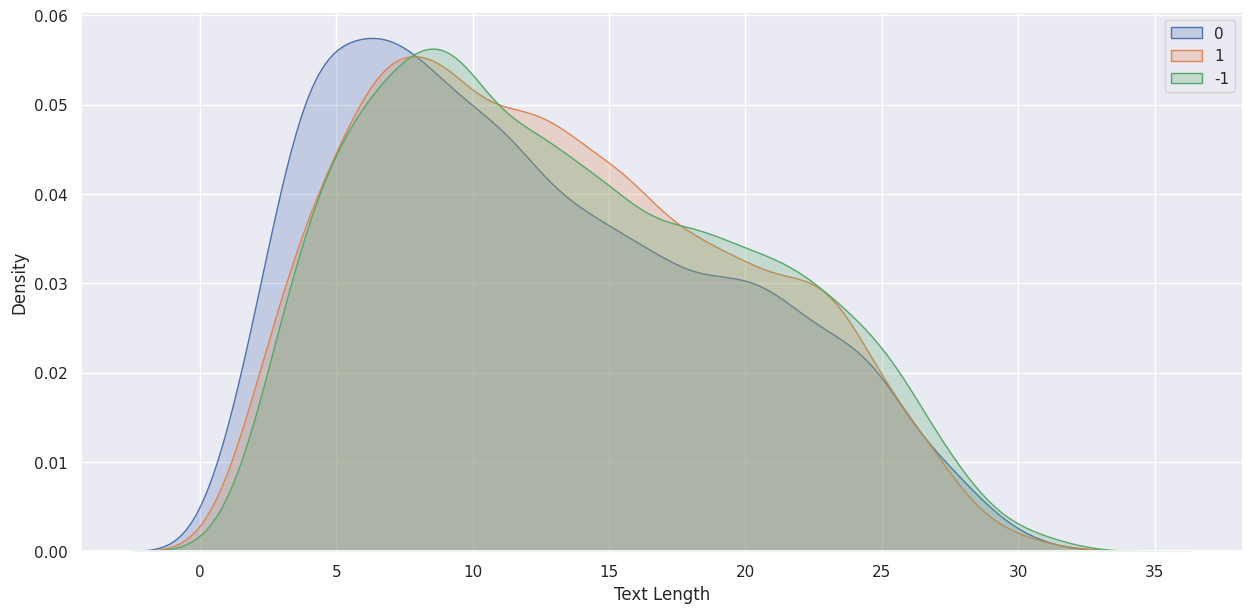

In [ ]:
sns.set(color_codes = True)
plt.figure(figsize = (15,7))
cmap =['r', 'g', 'b']
labels = [0, 1, -1]
for label,clr in zip(labels, cmap):
  sns.kdeplot(twitter.loc[(twitter['sentiment'] == label), 'num_words'], fill = clr, shade = True, label = label )
  plt.xlabel('Text Length')
  plt.ylabel('Density')
  plt.legend()


Let us visualize the most common frequent words

In [ ]:
import re
def clean(row):
    row = row.replace('.', ' ')
    row = row.replace(',', '')
    row = row.replace("'", "")
    row = re.sub("\d+", " ", row)
    row = re.sub("\*+", " ", row)
    row = re.sub("^@.*", " ", row)
    row = re.sub("^#.*", " ", row)
    row = re.sub("^((https|http|ftp|file)?:\/\/).*", " ", row)
    row = re.sub("[0-9]+:[0-9]+(am|AM|pm|PM)?", " ", row)
    row = row.lower().strip()
    return row.split()
twitter["text_split"] = twitter.text.apply(lambda row: clean(str(row)))
twitter["selected_text_split"] = twitter.selected_text.apply(lambda row: clean(str(row)))
twitter["text_split"]

0                                       [responded, going]
1                            [sooo, sad, miss, san, diego]
2                                         [boss, bullying]
3                                [interview, leave, alone]
4                   [sons, put, releases, already, bought]
                               ...                        
27476    [wish, could, come, see, u, denver, husband, l...
27477    [wondered, rake, client, made, clear, net, for...
27478    [yay, good, enjoy, break, probably, need, hect...
27479                                              [worth]
27480            [flirting, going, atg, smiles, yay, hugs]
Name: text_split, Length: 27480, dtype: object

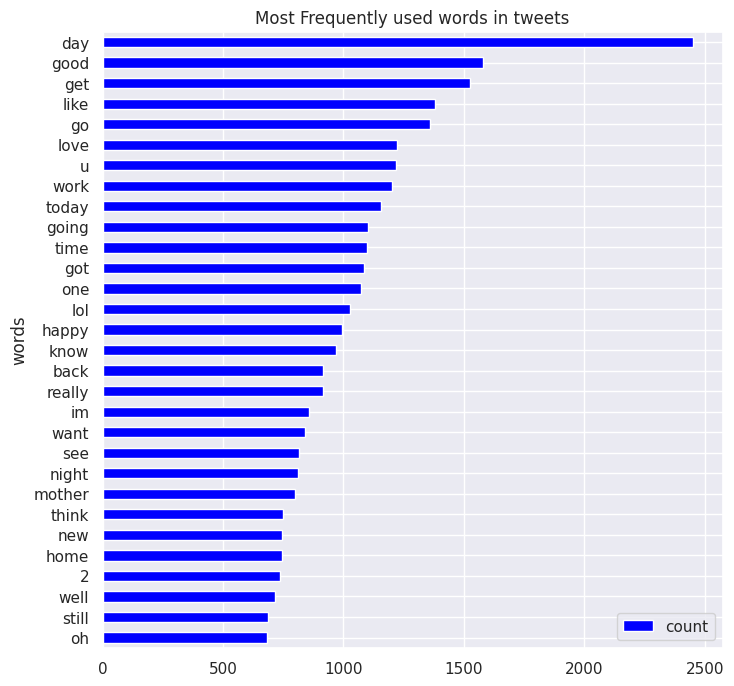

In [ ]:
import itertools
import collections

lem_token = list(twitter['lem_tokens'])
token_list = list(itertools.chain(*lem_token))
count_no = collections.Counter(token_list)
clean_tweets = pd.DataFrame(count_no.most_common(30), columns = ['words', 'count'])
fig, ax  = plt.subplots(figsize = (8,8))
clean_tweets.sort_values(by='count').plot.barh(x='words', y='count' , ax = ax, color = 'blue')
ax.set_title("Most Frequently used words in tweets")
plt.show()

In [ ]:
# Let us see the number of unique words
results = set()
twitter.text.apply(lambda row : results.update(str(row).lower().split()))
len(results)

24454

In [ ]:
results

{'interested',
 '5405',
 'portuguese',
 'intros',
 'hopfully',
 'coool',
 'demolished',
 'markets',
 'stitches',
 'storyyyyy',
 'transition',
 'mascara',
 'shouting',
 'coolness',
 'storyteller',
 'minstrels',
 'rrod',
 'subo',
 'goy',
 'flames',
 'marina',
 'whateverworks',
 'tabby',
 'seventh',
 'bleech',
 'row',
 'nav',
 'boooooooored',
 'yself',
 'derbyshire',
 'sounding',
 'bccg',
 'witty',
 'poisonous',
 'goodniqht',
 'suspicious',
 'bonnie',
 'yorks',
 'aftrn',
 'fists',
 'cynical',
 'taquito',
 'menlo',
 'na',
 'knockoffs',
 'poems',
 'kimbeommie',
 '1st',
 'wna',
 'shining',
 'cord',
 'ideia',
 'bapang',
 'topic',
 'sorrry',
 'singles',
 '3wordsaftersex',
 'unfollowers',
 'recycling',
 'feedings',
 'cory',
 'pigged',
 'ovie',
 'occured',
 'studyhall',
 'thiing',
 'echo',
 'alynn',
 'action',
 'payed',
 'bonfires',
 'bye',
 'impulse',
 'achan',
 'oil',
 'fiasco',
 'heartburn',
 'josey',
 'logins',
 'wisconsin',
 'unless',
 'suckss',
 'play',
 'shottie',
 'imnot',
 'celebrities'

Just by looking at the data there are some mispellings and numbers being included as words. the true word count should be less than this. spellchecking and removing  non alphabetical values should give a more accurate picture of how many words we are working with.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import re
vectorizer = CountVectorizer(stop_words = 'english')
twitter["text"] = twitter.text.apply(lambda x: re.sub("[^a-zA-Z' ]",' ', str(x)))
twitter = twitter[twitter["text"].notna()]
X_trains = vectorizer.fit_transform(twitter["text"])
print(X_trains.shape)
X_trains

(27480, 23354)


<27480x23354 sparse matrix of type '<class 'numpy.int64'>'
	with 163645 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaa', ..., 'zzzzy', 'zzzzzzz', 'zzzzzzzzzzzzzzz'],
      dtype=object)

In [ ]:
twitter.head()

,textID,text,selected_text,sentiment,len,num_words,text_split,selected_text_split,lem_tokens
0,cb774db0d1,responded going,responded going,0,36,7,"[responded, going]","[responded, going]","[responded, going]"
1,549e992a42,sooo sad miss san diego,sooo sad,-1,46,10,"[sooo, sad, miss, san, diego]","[sooo, sad]","[sooo, sad, miss, san, diego]"
2,088c60f138,boss bullying,bullying,-1,25,5,"[boss, bullying]",[bullying],"[bos, bullying]"
3,9642c003ef,interview leave alone,leave alone,-1,31,5,"[interview, leave, alone]","[leave, alone]","[interview, leave, alone]"
4,358bd9e861,sons put releases already bought,sons,-1,75,14,"[sons, put, releases, already, bought]",[sons],"[son, put, release, already, bought]"


In [ ]:
X = twitter["lem_tokens"]
y = twitter["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trains, y, stratify = y ,  train_size = 0.75)
print("The shape of X_train is ", X_train.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of y_test is ", y_test.shape)
print("The shape of X_test is ", X_test.shape)


The shape of X_train is  (20610, 23354)
The shape of y_train is  (20610,)
The shape of y_test is  (6870,)
The shape of X_test is  (6870, 23354)


In [ ]:
def model_Evaluate(model):

  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive','Neutral']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]

  plt.figure(figsize=(20, 4))
  plt.subplot(1, 4, 1)
  sns.heatmap(cf_matrix, annot=True,xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

          -1       0.67      0.58      0.62      1945
           0       0.59      0.65      0.62      2779
           1       0.69      0.67      0.68      2146

    accuracy                           0.64      6870
   macro avg       0.65      0.63      0.64      6870
weighted avg       0.64      0.64      0.64      6870



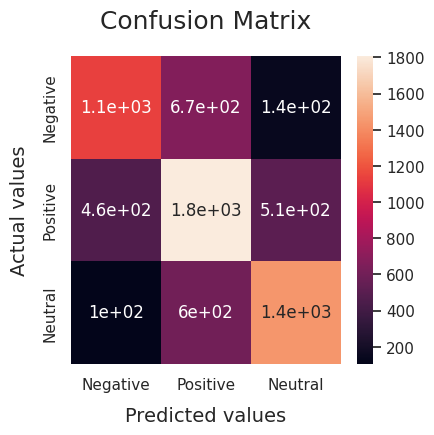

In [ ]:
model_Evaluate(model)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("The accuracy of the model is ", accuracy_score(y_test, y_pred))

The accuracy of the model is  0.6375545851528385


In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred =SVCmodel.predict(X_test)
print("The accuracy of the model is ", accuracy_score(y_test, y_pred))

The accuracy of the model is  0.6593886462882096


              precision    recall  f1-score   support

          -1       0.66      0.61      0.63      1945
           0       0.62      0.67      0.64      2779
           1       0.72      0.70      0.71      2146

    accuracy                           0.66      6870
   macro avg       0.67      0.66      0.66      6870
weighted avg       0.66      0.66      0.66      6870



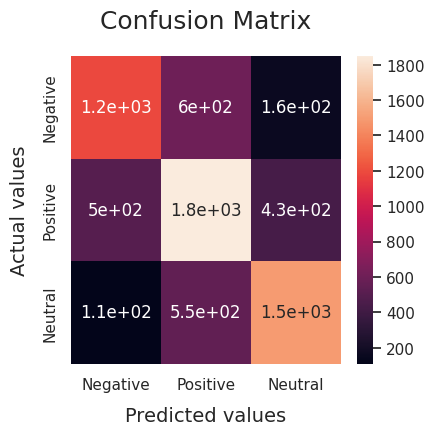

In [ ]:
model_Evaluate(SVCmodel)

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred =LRmodel.predict(X_test)
print("The accuracy of the model is ", accuracy_score(y_test, y_pred))

The accuracy of the model is  0.6790393013100436


              precision    recall  f1-score   support

          -1       0.69      0.61      0.65      1945
           0       0.62      0.71      0.66      2779
           1       0.76      0.70      0.73      2146

    accuracy                           0.68      6870
   macro avg       0.69      0.67      0.68      6870
weighted avg       0.68      0.68      0.68      6870



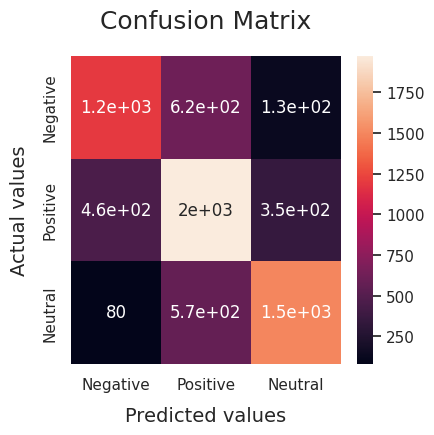

In [ ]:
model_Evaluate(LRmodel)